### Proyecto Integrador: Predicciones de precios de viviendas.

Situación: Eres data scientist en una inmobiliaria. Te piden predecir el precio de viviendas (regresión) y clasificar si son "caras" o "económicas". Además, debes segmentar los barrios según características de las propiedades.

#### 1. Importaciones.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

#### 2. Datos Sintéticos.

In [45]:
# Crear dataset de 500 viviendas.
np.random.seed(42)
n = 500
metros_cuadrados = np.random.randint(50, 300, n)
num_habitaciones = np.random.randint(1, 6, n)
distancia_centro = np.random.uniform(1, 20, n) # Km

precio = 1000 * metros_cuadrados + 50000 * num_habitaciones - 10000 * distancia_centro + np.random.normal(0, 20000, n)

# Crear Dataframe
df = pd.DataFrame({
    'metros_cuadrados': metros_cuadrados,
    'num_habitaciones': num_habitaciones,
    'distancia_centro': distancia_centro,
    'precio': precio
})

df.head()

,metros_cuadrados,num_habitaciones,distancia_centro,precio
0,152,2,7.515610,198877.030067
1,229,3,10.005429,280218.066327
2,142,2,7.746982,151773.120442
3,64,2,13.327634,21240.748722
4,156,2,10.112060,145589.262157


In [46]:
# Clasificación: "Cara" (1) si precio > percentil 75, sino "Económica" (0)
precio_umbral = np.percentile(precio, 75)
df['categoria_precio'] = (df['precio'] > precio_umbral).astype(int)

df.head()

,metros_cuadrados,num_habitaciones,distancia_centro,precio,categoria_precio
0,152,2,7.515610,198877.030067,0
1,229,3,10.005429,280218.066327,0
2,142,2,7.746982,151773.120442,0
3,64,2,13.327634,21240.748722,0
4,156,2,10.112060,145589.262157,0


In [47]:
print(f"\n¿Cuántas viviendas caras? {df['categoria_precio'].sum()}")


¿Cuántas viviendas caras? 125


#### 3. Análisis Exploratorio.

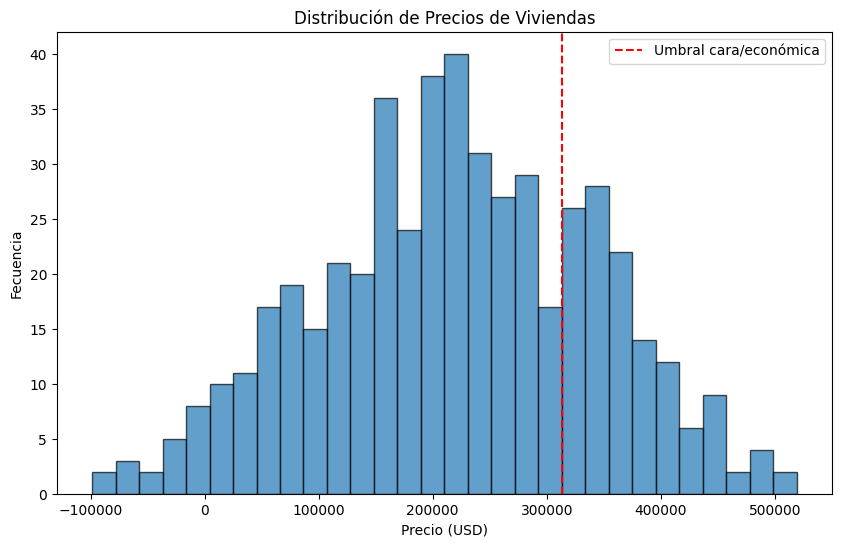

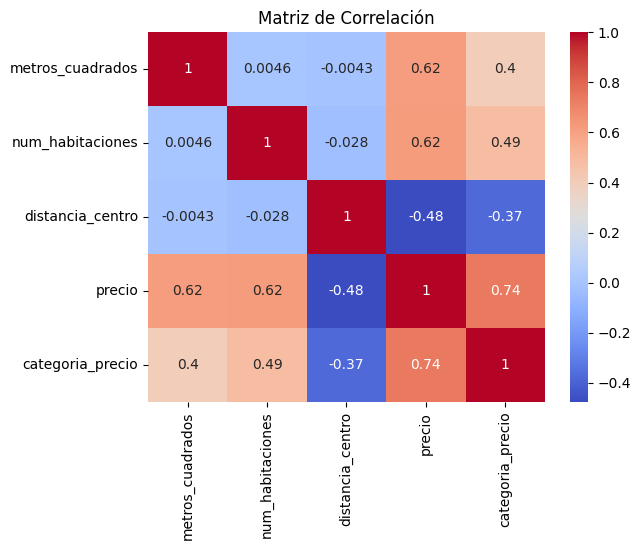

In [48]:
# Histograma de precios
plt.figure(figsize = (10, 6))
plt.hist(df['precio'], bins = 30, edgecolor = 'black', alpha = 0.7)
plt.axvline(precio_umbral, color = 'red', linestyle = '--', label = 'Umbral cara/económica')
plt.xlabel('Precio (USD)')
plt.ylabel('Fecuencia')
plt.legend()
plt.title('Distribución de Precios de Viviendas')

plt.show()

# Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlación')

plt.show()

#### Regresión Polinómica (Predecir Precio).

In [49]:
# Preparar datos
X_reg = df[['metros_cuadrados', 'num_habitaciones', 'distancia_centro']]
y_reg = df['precio']

# Crear características polinómicas
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X_reg)

# Dividir datos
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_poly, y_reg, test_size = 0.2, random_state = 42)

# Entrenar modelo
modelo_reg = LinearRegression()
modelo_reg.fit(X_train_reg, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
# Evaluar
y_pred_reg = modelo_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Error Cuadrático Medio: ${mse:.2f}")
print(f"Precio promedio real: ${y_test_reg.mean():.2f}")

Error Cuadrático Medio: $412332285.88
Precio promedio real: $233516.95


#### 5. Clasificación (Cara/Económica).

In [51]:
# Preparar datos
X_clf = df[['metros_cuadrados', 'num_habitaciones', 'distancia_centro']]
y_clf = df['categoria_precio']

# Dividir datos
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size = 0.2, random_state = 42, stratify = y_clf)

# Entrenar árbol
modelo_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
modelo_clf.fit(X_train_clf, y_train_clf)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [52]:
# Evaluar
y_pred_clf = modelo_clf.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Precisión clasificación: {accuracy:.2%}")

# Matriz de confusión
cm = confusion_matrix(y_test_clf, y_pred_clf)
print("Matiz de Confusión")
print(cm)

Precisión clasificación: 86.00%
Matiz de Confusión
[[70  5]
 [ 9 16]]


#### 6. Clustering (Segmentación de Mercado).

In [53]:
# Preparar datos para clustering
X_cluster = df[['metros_cuadrados', 'precio']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [54]:
# K-Means
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

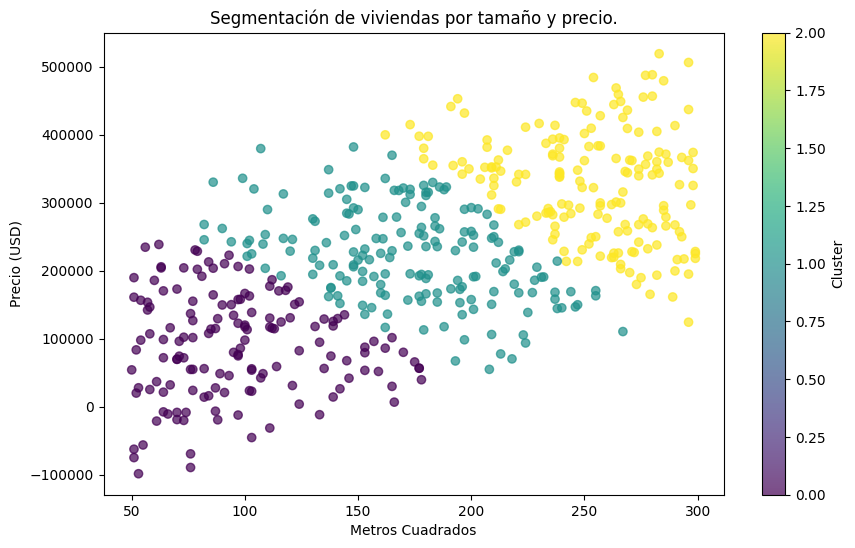

In [55]:
# Visualizar clusters
plt.figure(figsize = (10, 6))
scatter = plt.scatter(df['metros_cuadrados'], df['precio'], c = clusters, cmap = 'viridis', alpha = 0.7)
plt.colorbar(scatter, label = 'Cluster')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio (USD)')
plt.title('Segmentación de viviendas por tamaño y precio.')

plt.show()

In [56]:
# Interpretar clusters
df['cluster'] = clusters
cluster_stats = df.groupby('cluster')[['metros_cuadrados', 'precio']].mean()

print("Características por cluster:")
print(cluster_stats)

Características por cluster:
         metros_cuadrados         precio
cluster                                 
0               96.817568   89525.996147
1              172.819209  223066.663240
2              252.742857  327857.940992


#### 7. Red Neuronal Básica.

In [57]:
# Preparar datos para red neuronal
X_nn = X_scaled # Datos ya escalados del clustering
y_nn = df['categoria_precio'].values

# Inicializar pesos
np.random.seed(42)
pesos = np.random.randn(2, 1)
bias = np.random.randn(1)

# Entrenamiento
tasa_aprendizaje = 0.1
epocas = 1000

for epoch in range(epocas):
    # Forward pass
    z = np.dot(X_nn, pesos) + bias
    y_pred_nn = 1 / (1 + np.exp(-z))

    # Backward pass
    error = y_pred_nn - y_nn.reshape(-1, 1)
    gradiente_pesos = np.dot(X_nn.T, error) / len(X_nn)
    gradiente_bias = np.mean(error)

    # Actualizar
    pesos -= tasa_aprendizaje * gradiente_pesos
    bias -= tasa_aprendizaje * gradiente_bias

# Predicciones finales
predicciones_finales = (1 / (1 + np.exp(-np.dot(X_nn, pesos) + bias)) > 0.5).astype(int)
accuracy_nn = np.mean(predicciones_finales.flatten() == y_nn)

print(f"Precisión Red Neuronal: {accuracy_nn:.2%}")

Precisión Red Neuronal: 48.60%


---

### Ejercicio

Situación: Eres analista en una concesionaria de autos. Debes:
1. Predecir el precio de autos usados (regresión polinómica).
2. Clasificar si son "caros" o "económicos" (árbol de decisión).
3. Segmentar los autos para características (K-Means).
4. Clasificar con una red neuronal desde cero.

#### Datos Sintéticos:

In [58]:
# Generar datos de 300 autos
np.random.seed(123)
n = 300
kilometraje = np.random.randint(1000, 100000, n)
antiguedad = np.random.randint(1, 15, n)
cilindrada = np.random.choice([1000, 1500, 2000, 2500], n)
precio_auto = 20000 - 0.15 * kilometraje - 1000 * antiguedad + 5 * cilindrada + np.random.normal(0, 3000, n)

Tareas:

1. Crea un DataFrame con estas columnas.
2. Clasifica como "caro" (1) si el precio está arriba del percentil 75.
3. Aplica los 4 pasos del proyecto integrador (regresión, clasificación, clustering, red neuronal).
4. Genera visualizaciones clave.

#### 1. Importamos librerías.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#### 2. Creamos datos sintéticos.

In [60]:
# Datos.
np.random.seed(123)
n = 300
kilometraje = np.random.randint(1000, 100000, n)
antiguedad = np.random.randint(1, 15, n)
cilindrada = np.random.choice([1000, 1500, 2000, 2500], n)
precio_auto = 2000 - 0.15 * kilometraje - 1000 * antiguedad + 5 * cilindrada + np.random.normal(0, 3000, n)

# Creamos el DataFrame.
df = pd.DataFrame({
    'kilometraje': kilometraje,
    'antiguedad': antiguedad,
    'cilindrada': cilindrada,
    'precio_auto': precio_auto
})

df.head()

,kilometraje,antiguedad,cilindrada,precio_auto
0,16725,8,2000,976.478145
1,29030,11,1000,-9093.592772
2,18730,8,2000,-1419.852906
3,62404,4,2000,-2674.714996
4,64206,11,1500,-8328.465770


In [61]:
# Clasificamos: "Caro" (1) si precio > percentil 75, sino "Económico" (0)
precio_au = np.percentile(precio_auto, 75)
df['categoria_precio'] = (df['precio_auto'] > precio_au).astype(int)

df.head()

,kilometraje,antiguedad,cilindrada,precio_auto,categoria_precio
0,16725,8,2000,976.478145,1
1,29030,11,1000,-9093.592772,0
2,18730,8,2000,-1419.852906,0
3,62404,4,2000,-2674.714996,0
4,64206,11,1500,-8328.465770,0


In [62]:
print(f"¿Cuántos autos caros hay? {df['categoria_precio'].sum()}")

¿Cuántos autos caros hay? 75


#### 3. Análisis exploratorio.

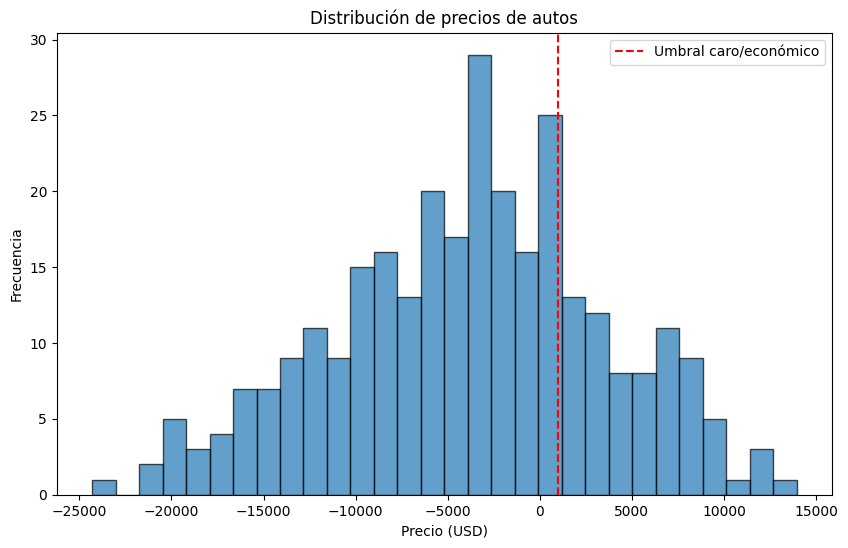

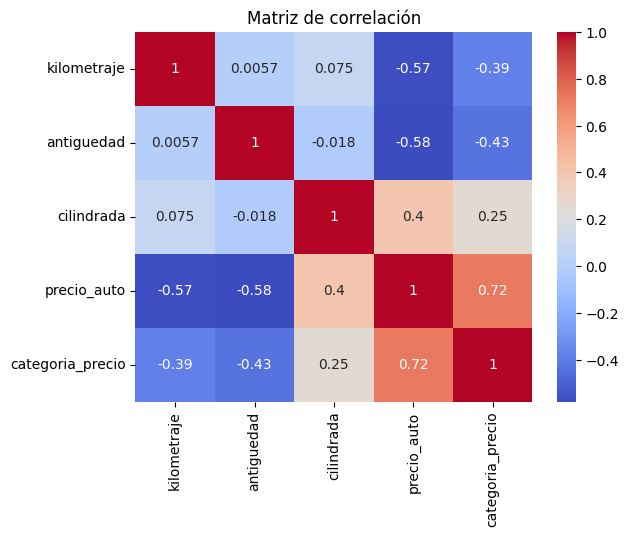

In [63]:
# Histograma de precios.
plt.figure(figsize = (10, 6))
plt.hist(df['precio_auto'], bins = 30, edgecolor = 'black', alpha = 0.7)
plt.axvline(precio_au, color = 'red', linestyle = '--', label = 'Umbral caro/económico')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de precios de autos')

plt.show()

# Matriz de correlación.
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Matriz de correlación')

plt.show()

#### 4. Regresión Polinómica.

In [64]:
X_reg = df[['kilometraje', 'antiguedad', 'cilindrada']]
y_reg = df['precio_auto']

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_reg_poly = poly.fit_transform(X_reg)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_poly, y_reg, test_size = 0.2, random_state = 42)

modelo = LinearRegression()
modelo.fit(X_train_reg, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
y_pred_reg = modelo.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Error Cuadrático Medio: ${mse:.2f}")
print(f"Precio promedio real: ${y_test_reg.mean():.2f}")

Error Cuadrático Medio: $8204957.02
Precio promedio real: $-2644.44


#### 5. Clasificación.

In [66]:
X_clf = df[['kilometraje', 'antiguedad', 'cilindrada']]
y_clf = df['categoria_precio']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size = 0.2, random_state = 42)

modelo_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
modelo_clf.fit(X_train_clf, y_train_clf)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
y_pred_clf = modelo_clf.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Precisión clasificación: {accuracy:.2%}")

Precisión clasificación: 81.67%


In [68]:
cm = confusion_matrix(y_test_clf, y_pred_clf)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[37  6]
 [ 5 12]]


#### 6. Clustering.

In [69]:
X_cluster = df[['kilometraje', 'precio_auto']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

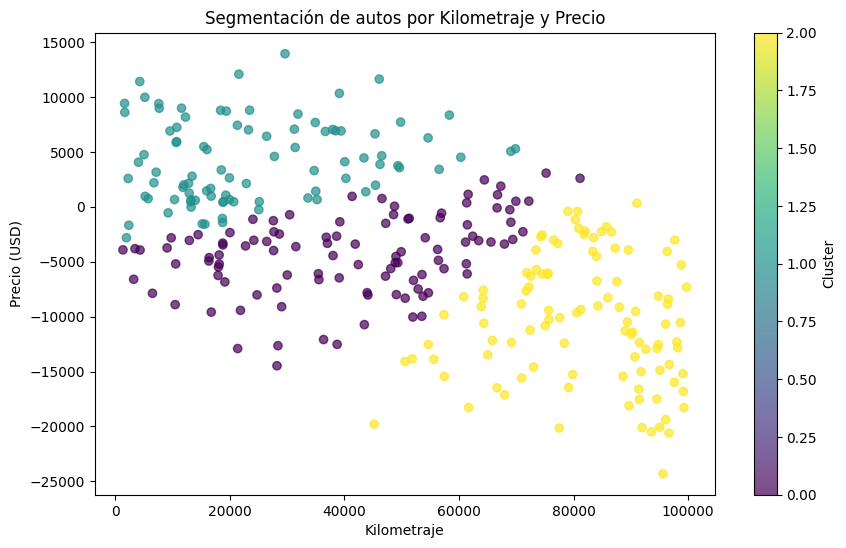

In [70]:
plt.figure(figsize = (10, 6))
scatter = plt.scatter(df['kilometraje'], df['precio_auto'], c = clusters, cmap = 'viridis', alpha = 0.7)
plt.colorbar(scatter, label = 'Cluster')
plt.xlabel('Kilometraje')
plt.ylabel('Precio (USD)')
plt.title('Segmentación de autos por Kilometraje y Precio')
plt.show()

In [71]:
df['cluster'] = clusters
cluster_stats = df.groupby('cluster')[['kilometraje', 'precio_auto']].mean()
print("Características por cluster:")
print(cluster_stats)

Características por cluster:
          kilometraje   precio_auto
cluster                            
0        40608.866667  -4326.667926
1        24311.582418   4254.800729
2        81706.548077 -10373.131958


#### 7. Red Neuronal Básica.

In [72]:
X_nn = X_scaled
y_nn = df['categoria_precio'].values

np.random.seed(42)
pesos = np.random.randn(2, 1)
bias = np.random.randn(1)

tasa_aprendizaje = 0.1
epocas = 1000

for epoch in range(epocas):
    # Forward pass
    z = np.dot(X_nn, pesos) + bias
    y_pred_nn = 1 / (1 + np.exp(-z))
    
    # Backward pass
    error = y_pred_nn - y_nn.reshape(-1, 1)
    gradiente_pesos = np.dot(X_nn.T, error) / len(X_nn)
    gradiente_bias = np.mean(error)
    
    # Actualizar
    pesos -= tasa_aprendizaje * gradiente_pesos
    bias -= tasa_aprendizaje * gradiente_bias

predicciones_finales = (1 / (1 + np.exp(-np.dot(X_nn, pesos) + bias)) > 0.5).astype(int)
accuracy_nn = np.mean(predicciones_finales.flatten() == y_nn)
print(f"Precisión Red Neuronal: {accuracy_nn:.2%}")

Precisión Red Neuronal: 49.00%
